In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color  import rgb2lab,deltaE_cie76
import pandas as pd
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
The shape of image is (750, 1000, 3)


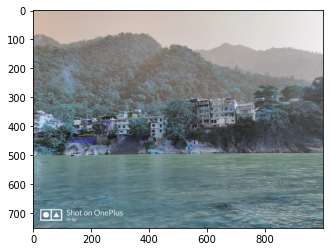

In [3]:
path='sample_rishikesh.jpeg'
image=cv2.imread(path) #to load an image from the specified file.
print("The type of this input is {}".format(type(image)))

print('The shape of image is {}'.format(image.shape))
plt.imshow(image)
plt.show()

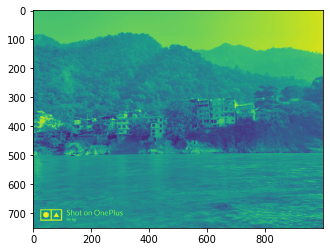

In [4]:
#OpenCV by default reads an image in color order BLUE GREEN RED i.e. in BGR. Thus we need to convert it into RED GREEN BLUE RGB. 
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image)

plt.show()

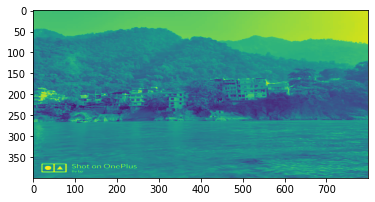

In [5]:
image_resized=cv2.resize(image,(800,400))
plt.imshow(image_resized)
plt.show()

In [18]:
#to format three numbers as 2 digit hexadecimal strings with leading 0s used if the number only consists of a single 
#digit in hex. This is used for producing RGB color values.

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [35]:
# to load the image, convert it into RGB and then returning that image.
def load_image(img):
  image=cv2.imread(img)
  image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  return image

In [55]:
def get_colors(image, number_of_colors, show_chart):
  #print(image)
  img=cv2.resize(image,(600,400),interpolation=cv2.INTER_AREA)
  #print(img.shape)
  img=img.reshape((400*200,3))  #ml algos do not take images as input so converting the image to a numpy array 
  #print(img.shape)
  clf=KMeans(n_clusters=number_of_colors)
  labels=clf.fit_predict(img)
  clusters=clf.cluster_centers_

  counts=Counter(labels)
  # sort to ensure correct color percentage
  counts=dict(sorted(counts.items()))

  # We get ordered colors by iterating through the keys
  #print(clusters)
  ordered_colors=[clusters[i] for i in counts.keys()]   #clusters are the centre colors
  hex_colors=[RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors=[ordered_colors[i] for i in counts.keys()]
  if (show_chart):
    plt.figure(figsize=(12,7))
    plt.pie(counts.values(),labels=hex_colors,colors=hex_colors)
  return rgb_colors

(80000, 3)
[[137.5200366  137.74742299 137.35730406]
 [192.384917   193.05777023 192.55875049]
 [ 80.91377015  80.22407928  80.73066114]
 [165.89729983 166.76478851 166.48571875]
 [222.24076894 222.95717549 222.72154549]
 [105.80987306 105.47606958 105.82792666]
 [ 55.84429935  54.54168759  55.33952788]
 [122.33641719 122.33091861 122.24883264]]


[array([137.5200366 , 137.74742299, 137.35730406]),
 array([192.384917  , 193.05777023, 192.55875049]),
 array([80.91377015, 80.22407928, 80.73066114]),
 array([165.89729983, 166.76478851, 166.48571875]),
 array([222.24076894, 222.95717549, 222.72154549]),
 array([105.80987306, 105.47606958, 105.82792666]),
 array([55.84429935, 54.54168759, 55.33952788]),
 array([122.33641719, 122.33091861, 122.24883264])]

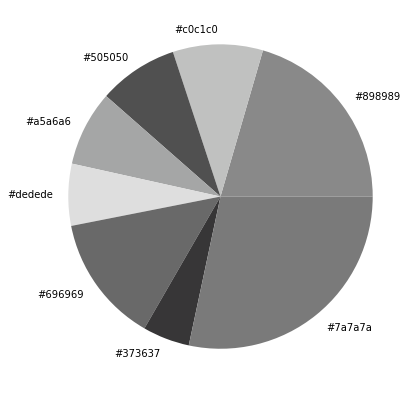

In [28]:
get_colors(load_image(path),8,True)

Multiple Images

In [29]:
import os
os.makedirs('Images')

In [39]:
!pwd

/content


In [40]:
!ls '/Images/.ipynb_checkpoints'

ls: cannot access '/Images/.ipynb_checkpoints': No such file or directory


In [56]:
IMAGES_DIR='Images'
colors={
     'WHITE' : [255,255,255],
    'PINK': [227,0,235],
    'RED': [255,0,0],
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]

}

images=[]
for f in os.listdir(IMAGES_DIR):
  path=os.path.join(IMAGES_DIR,f)
  if path!='Images/.ipynb_checkpoints':
    print(path)
    images.append(load_image(path))
  else:
    pass  

Images/Image_2.jfif
Images/Image_1.jfif
Images/Image_7.jfif
Images/Image_5.jfif
Images/Image_6.jfif
Images/Image_3.jfif
Images/Image_4.jfif


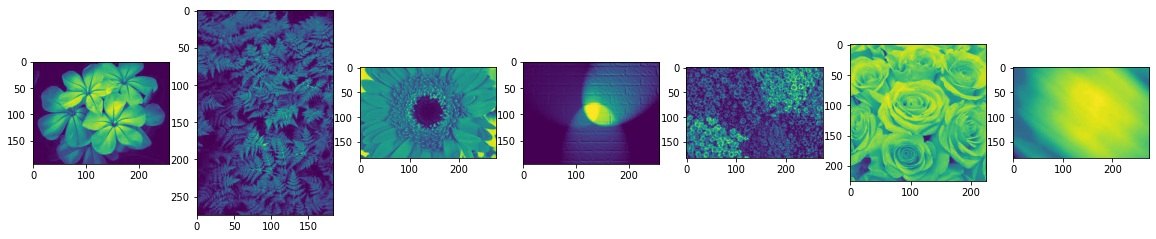

In [57]:
plt.figure(figsize=(20,10))
for i in range(len(images)):
  plt.subplot(1,len(images),i+1)
  plt.imshow(images[i])

In [58]:
def match_color_and_image(image,color,threshold=60,num_colors=10):
  img_colors=get_colors(image,num_colors,False)
  lab_color=rgb2lab(np.uint8(np.asarray([[color]])))#converts RGB to CIE 1976 L*a*b values. The CIELAB color space 
                                                              #(also known as CIE L*a*b*) is a color space defined by the  
                                                              #International Commission on Illumination (CIE) in 1976.
  flag=False
  for i in range(num_colors):
    curr_color= rgb2lab(np.uint8(np.asarray([[img_colors[i]]])))    
    euc_dis=deltaE_cie76(lab_color,curr_color)  
    #print(euc_dis)
    if (euc_dis<threshold):
      flag=True
    return flag                                                    

In [76]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_color_and_image(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
           
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

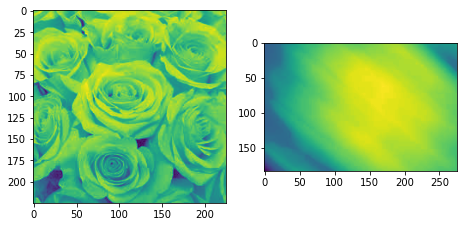

In [62]:
plt.figure(figsize = (20, 10))
show_selected_images(images,colors['BLUE'],60,5)
plt.show()

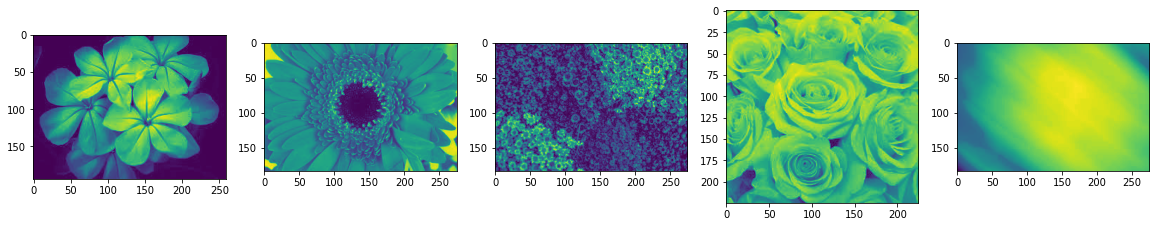

In [64]:
plt.figure(figsize = (20, 10))
show_selected_images(images,colors['WHITE'],60,5)
plt.show()